In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from wordcloud import WordCloud 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,  classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

In [36]:
data = pd.read_excel('C:\\Users\\Admin\\Desktop\\nlp research\\proj data\\course_list.xlsx')
data.shape

(1398, 2)

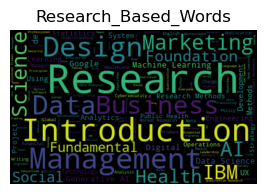

In [37]:
#research_based_words
res_text = ' '.join( 
    data['course'][data['r_val'] == 1].tolist()) 
wordcloud = WordCloud(width=400, height=250, 
                      background_color='black').generate(res_text) 
plt.figure(figsize=(5, 2)) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis('off') 
plt.title('Research_Based_Words') 
plt.savefig('res_words.jpg')
plt.show() 

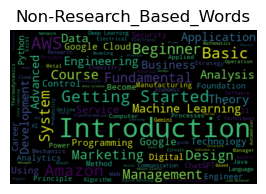

In [38]:
#non-research_based_words
nres_text = ' '.join( 
    data['course'][data['r_val'] == 0].tolist()) 
wordcloud = WordCloud(width=400, height=250, 
                      background_color='black').generate(nres_text) 
plt.figure(figsize=(5, 2)) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis('off') 
plt.title('Non-Research_Based_Words') 
plt.savefig('non-res_words.jpg')
plt.show()

In [59]:
#pipeline_creation
tf_idf = TfidfVectorizer(stop_words = 'english', ngram_range = (1, 2), max_features = 1400)

x_tr, x_ts, y_tr, y_ts = train_test_split(data['course'], data['r_val'], test_size = 0.3)

logit = LogisticRegression(C = 1, penalty = 'l2', solver = 'lbfgs', random_state = 55)
pipe = Pipeline([('tf_idf', tf_idf), ('logit', logit)])
pipe.fit(x_tr, y_tr)

Pipeline(steps=[('tf_idf',
                 TfidfVectorizer(max_features=1400, ngram_range=(1, 2),
                                 stop_words='english')),
                ('logit', LogisticRegression(C=1, random_state=55))])

In [60]:
y_pred = pipe.predict(x_ts)
#model_performance
acc = accuracy_score(y_ts, y_pred)
clas = classification_report(y_ts, y_pred)
cm = confusion_matrix(y_ts, y_pred)

print('accuracy: \n', round(acc,3)*100, '%')
print("report: \n",clas)
print("confusion_matrix: \n", cm)

accuracy: 
 79.0 %
report: 
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       250
           1       0.79      0.66      0.72       170

    accuracy                           0.79       420
   macro avg       0.79      0.77      0.78       420
weighted avg       0.79      0.79      0.79       420

confusion_matrix: 
 [[220  30]
 [ 58 112]]


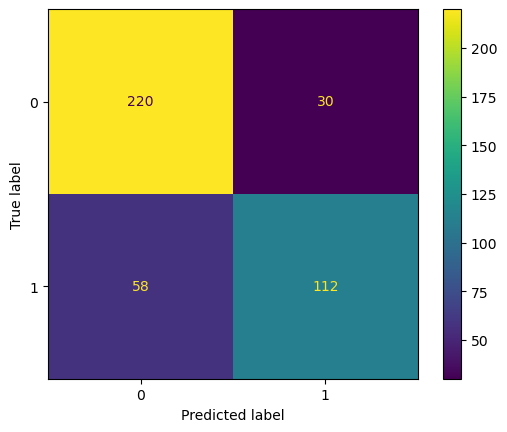

In [61]:
#visual_representation
cm_disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
cm_disp.plot()
plt.savefig('conf_matrx.jpg')
plt.show()